<a href="https://colab.research.google.com/github/fabiola2024/Data_Science-II/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción

Este proyecto quiere utilizar el auge positivo del mundo inmobiliario, intentando darle una solución aquellas aplicaciones que se dedican a la venta y alquileres de departamentos, casas y otras propiedades.

Problema:
 En una gran inmobiliaria, estan realizando una modernización para llegar ampliar su alcance a mayores clientes, incorporando la tecnologia. Para ello, estan creando un sotware innovador para publicar, vender, alquilar y realizar otras operaciones. Una de las actualizaciones es la tarea de los tasadores, que estan llevando su rol de manera tradicional, un proceso díficil y a veces subjetivo.

Solución:
 Para dar una respuesta a ello, se propondrá crear un modelo de Machine Learning que a ciertas caracteristicas de las propiedaes, prediga el precio de los inmuebles.

Dataset original: data_properati

El dataset contiene información sobre propiedades y sus caracterticas dentro de Latinoamerica. A continuación, se describe cada columna:

| **Columna**        | **Descripción**                                                                 | **Tipo**                 |
|--------------------|---------------------------------------------------------------------------------|--------------------------|
| **id**            | Identificador único de cada propiedad.                                           | Categórico (String)      |
| **ad_type**       | Tipo de anuncio (si corresponde a una propiedad en alquiler o venta).           | Categórico (String)      |
| **start_date**    | Fecha en la que se publicó el anuncio.                                          | Categórico (String)      |
| **end_date**      | Fecha en la que el anuncio dejó de estar disponible.                            | Categórico (String)      |
| **created_on**    | Fecha de creación del registro en la base de datos.                            | Categórico (String)      |
| **lat**          | Latitud de la ubicación de la propiedad.                                        | Numérico (Flotante)      |
| **lon**          | Longitud de la ubicación de la propiedad.                                       | Numérico (Flotante)      |
| **l1**           | País en el que se encuentra la propiedad.                                       | Categórico (String)      |
| **l2**           | Provincia o estado donde se encuentra la propiedad.                            | Categórico (String)      |
| **l3**           | Ciudad o localidad donde se encuentra la propiedad.                            | Categórico (String)      |
| **rooms**        | Cantidad total de ambientes de la propiedad.                                   | Numérico (Flotante)      |
| **bedrooms**     | Cantidad de dormitorios de la propiedad.                                       | Numérico (Flotante)      |
| **bathrooms**    | Cantidad de baños de la propiedad.                                             | Numérico (Flotante)      |
| **surface_total**  | Superficie total de la propiedad en metros cuadrados.                        | Numérico (Flotante)      |
| **surface_covered**| Superficie cubierta de la propiedad en metros cuadrados.                     | Numérico (Flotante)      |
| **price**        | Precio de la propiedad en la moneda indicada.                                 | Numérico (Flotante)      |
| **currency**     | Moneda en la que está expresado el precio (por ejemplo, USD, ARS, UYU).      | Categórico (String)      |
| **price_period** | Periodo de tiempo al que corresponde el precio (por ejemplo, mensual, anual). | Categórico (String)      |
| **title**        | Título del anuncio de la propiedad.                                           | Categórico (String)      |
| **description**  | Descripción detallada de la propiedad en el anuncio. Puede incluir etiquetas HTML. | Categórico (String)  |
| **property_type**| Tipo de propiedad (por ejemplo, departamento, casa, PH, local comercial).    | Categórico (String)      |
| **operation_type**| Tipo de operación (venta o alquiler).                                       | Categórico (String)      |


## Data Wrangling

### Overview

In [1]:
!pip install gdown

In [2]:
import pandas as pd
import zipfile
import gdown

# ID del archivo de Google Drive
file_id = '1zQDl5J4a3zRPCSD3v-N54M-r-WyDgMqX'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Descargar usando gdown
output = 'ar_properties.csv.zip'
gdown.download(url, output, quiet=False)

# Descomprimir y leer CSV
csv_filename = 'ar_properties.csv'
with zipfile.ZipFile(output) as z:
    with z.open(csv_filename) as f:
        data_ar = pd.read_csv(f)

print(data_ar.head())

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1zQDl5J4a3zRPCSD3v-N54M-r-WyDgMqX
From (redirected): https://drive.google.com/uc?export=download&id=1zQDl5J4a3zRPCSD3v-N54M-r-WyDgMqX&confirm=t&uuid=a25d3d1c-c08b-4fb5-bbde-f048ecf5e765
To: /content/ar_properties.csv.zip
100%|██████████| 287M/287M [00:04<00:00, 67.4MB/s]


                         id    ad_type  start_date    end_date  created_on  \
0  fmHRPwLNda4lAWnkAHuqUA==  Propiedad  2020-12-26  2021-01-11  2020-12-26   
1  ya84G5MFlLS5AhrvoE8BDA==  Propiedad  2020-12-26  2020-12-27  2020-12-26   
2  aVHalWslWRaUFFVXOwcKCQ==  Propiedad  2020-12-26  9999-12-31  2020-12-26   
3  uTw1Fc2aS1k/ic+idHpUsQ==  Propiedad  2020-12-26  9999-12-31  2020-12-26   
4  ZGyAXBl38Bp3zOUNNw47QA==  Propiedad  2020-12-26  9999-12-31  2020-12-26   

         lat        lon         l1                        l2         l3  ...  \
0 -34.466060 -58.614506  Argentina  Bs.As. G.B.A. Zona Norte      Tigre  ...   
1 -34.386038 -58.674186  Argentina  Bs.As. G.B.A. Zona Norte      Tigre  ...   
2 -34.648427 -58.630494  Argentina  Bs.As. G.B.A. Zona Oeste      Morón  ...   
3 -34.649915 -58.590843  Argentina  Bs.As. G.B.A. Zona Oeste      Morón  ...   
4 -34.640844 -58.669036  Argentina                Corrientes  Ituzaingó  ...   

  bathrooms surface_total  surface_covered     pri

In [3]:
print(data_ar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1000000 non-null  object 
 1   ad_type          1000000 non-null  object 
 2   start_date       1000000 non-null  object 
 3   end_date         1000000 non-null  object 
 4   created_on       1000000 non-null  object 
 5   lat              882875 non-null   float64
 6   lon              882632 non-null   float64
 7   l1               1000000 non-null  object 
 8   l2               1000000 non-null  object 
 9   l3               967428 non-null   object 
 10  l4               284385 non-null   object 
 11  l5               5834 non-null     object 
 12  l6               0 non-null        float64
 13  rooms            678008 non-null   float64
 14  bedrooms         618956 non-null   float64
 15  bathrooms        768087 non-null   float64
 16  surface_total    42

In [4]:
# Renombrar las columnas las columnas: l1, l2, l3
data_ar = data_ar.rename(columns={
    'l1': 'país',
    'l2': 'provincia',
    'l3': 'localidad'
})

In [5]:
print(data_ar.sample(10))
data_ar.tail(10)

                              id    ad_type  start_date    end_date  \
176537  FKpqulOR1Az+t1+eBANmVg==  Propiedad  2021-03-02  2021-03-03   
820334  HTWZHyJIfY0q3eeKqtmb1Q==  Propiedad  2020-10-08  9999-12-31   
238184  bi+cEVOX1oEDBIv5VLqnnQ==  Propiedad  2020-08-03  2020-09-20   
585571  RnlKUS2Qij/0YXYZA32VSQ==  Propiedad  2020-11-02  2020-11-03   
830108  oGZzJtskYXdu+8vOi9uDag==  Propiedad  2020-04-07  9999-12-31   
243655  Likv6nqE0KiWdIHWJrKaNQ==  Propiedad  2020-10-24  9999-12-31   
659075  Y4uhSVzj3Z2QuCHSiY6D5w==  Propiedad  2021-04-24  2021-04-25   
950793  y5whaphZ+0DiLrenfGVw2A==  Propiedad  2020-05-04  2021-05-04   
648889  f4ARsi+PTWiYAJRLZ/xrCw==  Propiedad  2021-02-22  2021-02-23   
484192  QPXCg1aftI4VFQMuW22HEA==  Propiedad  2020-12-22  9999-12-31   

        created_on        lat        lon       país                 provincia  \
176537  2021-03-02 -34.757083 -58.401700  Argentina    Bs.As. G.B.A. Zona Sur   
820334  2020-10-08 -34.879038 -58.532877  Argentina    B

,id,ad_type,start_date,end_date,created_on,lat,lon,país,provincia,localidad,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
999990,GQzHWOLySTXcZvMopnwpbw==,Propiedad,2020-12-02,2021-03-10,2020-12-02,-34.901085,-56.176977,Uruguay,Montevideo,NaN,...,1.0,40.0,40.0,23000.0,UYU,Mensual,Local Comercial en Alquiler - Centro,Local Comercial en Alquiler - Centro<br> Baño<...,Departamento,Alquiler
999991,er5hS7wBKQtEpq0toqrdHQ==,Propiedad,2020-12-02,2021-01-19,2020-12-02,-34.915374,-56.159642,Uruguay,Montevideo,NaN,...,1.0,39.0,39.0,17000.0,UYU,Mensual,Monoambiente en alquiler con garaje en Punta C...,Apartamento monoambiente en alquiler en Punta ...,Departamento,Alquiler
999992,8grJ9oei0Ku3jKBW/xlkZg==,Propiedad,2020-12-02,2020-12-11,2020-12-02,-34.896064,-56.166007,Uruguay,Montevideo,NaN,...,1.0,45.0,45.0,18700.0,UYU,Mensual,Apartamento - Tres Cruces,Apartamento de 1 dormitorio en alquiler en Tre...,Departamento,Alquiler
999993,/FqeY0xN/aZ3N6MpgXSJ7w==,Propiedad,2020-12-02,2020-12-18,2020-12-02,-34.911440,-56.186282,Uruguay,Montevideo,NaN,...,1.0,57.0,42.0,25000.0,UYU,Mensual,"¡Increíble vista! 1 dormitorio en alquiler, te...",Apartamento de 1 dormitorio en alquiler en Bar...,Departamento,Alquiler
999994,sRjgJ6vHFutdCxLWJwK4qQ==,Propiedad,2020-12-02,2021-01-21,2020-12-02,-34.870624,-56.184851,Uruguay,Montevideo,NaN,...,1.0,45.0,NaN,15900.0,UYU,Mensual,"Alquiler apartamento, casita en Brazo oriental...","Alquiler de apartamento en Brazo Oriental, en...",PH,Alquiler
999995,RwxCSDKk259qAY8vO6VKCA==,Propiedad,2020-12-02,2021-01-12,2020-12-02,-34.465824,-57.842673,Uruguay,Colonia,NaN,...,2.0,108.0,108.0,20000.0,UYU,Mensual,Casa - Colonia del Sacramento,"Casa recientemente reciclada en pleno centro, ...",Casa,Alquiler
999996,uUh7N3jRuR8yF08X6zSurg==,Propiedad,2020-12-02,2021-04-22,2020-12-02,-34.897735,-56.166230,Uruguay,Montevideo,NaN,...,1.0,58.0,58.0,26000.0,UYU,Mensual,2 Dormitorios | Con garaje | Tres Cruces,¡Apartamento con garaje incluido en Tres Cruce...,Departamento,Alquiler
999997,BCVP/E4Q1B8QhOlTh7X4Ug==,Propiedad,2020-12-02,2020-12-15,2020-12-02,-33.995386,-58.286154,Uruguay,Colonia,Carmelo,...,1.0,60.0,NaN,12500.0,UYU,Mensual,Alquiler,CASA A ESTRENAR EN ZONA DE EXPANSIÓN<br><br>LA...,Casa,Alquiler
999998,2/w++6rW0EKlqeP2J7MpPQ==,Propiedad,2020-12-02,2021-04-06,2020-12-02,-34.917295,-56.150024,Uruguay,Montevideo,Pocitos,...,2.0,135.0,135.0,75000.0,UYU,Mensual,Apartamento - Pocitos,Alquiler de apartamento de 2 dormitorios con p...,Departamento,Alquiler
999999,AOhK8l0PxgaqdnAkc4qO4w==,Propiedad,2020-12-02,2020-12-09,2020-12-02,-33.995386,-58.286154,Uruguay,Colonia,Carmelo,...,1.0,NaN,NaN,11000.0,UYU,Mensual,Casa - Carmelo,APARTAMENTO EN VIVIENDAS L-23<br><br>COMPUESTO...,Casa,Alquiler


In [6]:
data_ar.duplicated().sum()

np.int64(0)

Se focaliza en el analisis de las propiedades de Argentina.

In [7]:
data_ar.país.unique()

array(['Argentina', 'Uruguay', 'Estados Unidos', 'Brasil'], dtype=object)

In [8]:
data_ar= data_ar[data_ar['país']=='Argentina']

¿Qué provincias se encuentran?

In [9]:
data_ar.groupby(['país','provincia']).size().sort_values(ascending=False)

país       provincia                   
Argentina  Capital Federal                 255028
           Bs.As. G.B.A. Zona Norte        167238
           Bs.As. G.B.A. Zona Sur          144934
           Buenos Aires Costa Atlántica    107156
           Santa Fe                         81819
           Bs.As. G.B.A. Zona Oeste         78281
           Córdoba                          63973
           Buenos Aires Interior            24314
           Neuquén                          13825
           Mendoza                           7956
           Río Negro                         6533
           Tucumán                           6264
           Entre Ríos                        6216
           Salta                             5072
           Misiones                          4376
           San Luis                          1971
           La Pampa                          1601
           Chubut                            1330
           Chaco                             1297
           Corrientes                        1204
           San Juan                          1186
           Jujuy                              571
           Tierra Del Fuego                   439
           Santa Cruz                         426
           Catamarca                          391
           La Rioja                           379
           Santiago Del Estero                274
           Formosa                             23
dtype: int64

Esta distribución nos dice que hay muchisima información en CABA y GBA, pero después el número de registros cae en otras provincias.

* Capital+ GBA= +600K propiedades
* Formosa,Catamarca, La Rioja= menos de 500 registros

In [10]:
data_ar[(~data_ar['lat'].between(-55, -21.5)) &
         (~data_ar['lon'].between(-73.5, -53.5)) &
         (data_ar.localidad.isna())]

,id,ad_type,start_date,end_date,created_on,lat,lon,país,provincia,localidad,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
116,mEla1mbVL9aXpoH2Gkl1+g==,Propiedad,2020-12-26,2021-02-02,2020-12-26,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,NaN,...,1.0,65.0,40.0,900.0,USD,Mensual,"ENERO,FEB Y MARZO Casa de Campo 1 dorm Parada ...",GVL Chacra en Parada Robles. El predio cuenta ...,Casa,Alquiler temporal
189,iwLvaaA5C88H507AJiwa+Q==,Propiedad,2020-12-26,2021-05-08,2020-12-26,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,NaN,...,2.0,NaN,147.0,145000.0,USD,Mensual,Venta - Casa - Barrio El Remanso - Exaltación ...,"Casa de 110 metros desarrollada en una planta,...",Casa,Venta
229,QGDpXI4MVJwPkekA+IlhqA==,Propiedad,2020-12-26,2021-01-06,2020-12-26,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,NaN,...,2.0,250.0,250.0,15000.0,USD,Mensual,"Alquiler Abril a Dic 2021, 3 dorm Los Cardales",GVL Casa en alquiler en el Country Club Los Ca...,Casa,Alquiler temporal
230,quPGsijr+pBAqHUABXv0tA==,Propiedad,2020-12-26,2021-01-18,2020-12-26,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,NaN,...,3.0,230.0,200.0,2200.0,USD,Mensual,Chacra 3 dorm Temporario en Exaltacion de la Cruz,"GVL Casa de campo en Chacras del Molino, Parad...",Casa,Alquiler temporal
231,2eUx/ShoiLIh2qe2AP5n4A==,Propiedad,2020-12-26,2021-04-10,2020-12-26,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,NaN,...,2.0,110.0,151.0,112000.0,USD,Mensual,Casa - Los Cardales,"Casa en Venta en los Cardales barrio ""Los Car...",Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999672,VsP3GjflQqYRV+AWm99zcg==,Propiedad,2020-12-02,2020-12-04,2020-12-02,NaN,NaN,Argentina,Capital Federal,NaN,...,3.0,200.0,190.0,180000.0,USD,Mensual,OPORTUNIDAD - Casa Multifamiliar - Villa Maipú...,"Sobre un lote de 200 metros, se encuentra esta...",Casa,Venta
999673,mLtB1XTiMNU0AdakhziUyw==,Propiedad,2020-12-02,2020-12-04,2020-12-02,NaN,NaN,Argentina,Capital Federal,NaN,...,4.0,800.0,270.0,440000.0,USD,Mensual,Casa estilo Moderno al Lago c/opciones de pago...,Sobre un lote CENTRAL de 800 metros y salida d...,Casa,Venta
999851,so4d0pnl+EDB8wK7cqq+yg==,Propiedad,2020-12-02,2020-12-14,2020-12-02,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,NaN,...,7.0,587.0,411.0,599000.0,USD,Mensual,"GVL Venta casa 6 dorm Las Praderas, Lujan",GVL Venta Casa 6 dormitorios en C.C. Las Prade...,Casa,Venta
999852,xUcCaaGQp3kJRJ3JYk1gzg==,Propiedad,2020-12-02,2021-02-19,2020-12-02,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,NaN,...,7.0,587.0,411.0,599000.0,USD,Mensual,"GVL Venta casa 6 dorm Las Praderas, Lujan",GVL Venta Casa 6 dormitorios en C.C. Las Prade...,Casa,Venta


Insight:
Hay 7820 filas que cumplen con estas 3 condiciones:

1. lat (latitud) está vacía (NaN) o fuera de Argentina,

2. lon (longitud) está vacía (NaN) o fuera de Argentina,

3. no tienen definida la localidad.

### Estadistica resumen

In [11]:
stast_categoricos= data_ar.describe(exclude='number'). T
stast_categoricos['frec_perc']= (stast_categoricos['freq']/len(data_ar)).round(2)

stast_categoricos.sort_values('frec_perc', ascending= False)


,count,unique,top,freq,frec_perc
ad_type,984077,1,Propiedad,984077,1.0
país,984077,1,Argentina,984077,1.0
operation_type,984077,3,Venta,746365,0.758442
currency,941572,4,USD,728910,0.740704
property_type,984077,10,Departamento,419748,0.42654
price_period,398567,3,Mensual,398537,0.404986
provincia,984077,28,Capital Federal,255028,0.259155
end_date,984077,450,9999-12-31,215788,0.21928
localidad,958233,1307,Mar del Plata,84642,0.086012
l4,283576,1045,Nordelta,20048,0.020372


Insights:

1. **ad_type**: único valor (“Propiedad”).No aporta variabilidad ⇒ entropía 0

2. pais: unico valor (Argentina)

3. operation_type:
valores, dominado por “Venta” (75 %)	Mezcla ventas vs. alquileres; la escala de precios es incomparable (precio de venta vs. alquiler mensual).

4. currency:
valores, 74 % USD, resto ARS/PEN/COP. Útil para normalizar precios históricos.

5. property_type:
10 valores (“Departamento” 42 %, “Casa” 24 %, etc.)	Variable central: modelos de precio necesitan distinguir tipos.

6. price_period:
40 % cobertura; “Mensual” domina.	Sólo relevante para alquileres. Para ventas suele venir NaN.

7. provincia:
28 niveles, distribución larga cola (Capital Federal 26 %)	Gran relevancia geográfica. Cardinalidad baja‑media: codificación sencilla.

8. localidad:
1 307 niveles, cobertura 97 %	Información fina local ⇒ potente pero de alta cardinalidad (≈ 1.3 k).

9. **l4 y l5**:
la mayoria de los registros son Nan


10. **start_date / created_on**
362 valores, idéntica moda; parecen duplicados.	Útiles para capturar ciclo económico (e.g. inflación, estacionalidad).

11. **title/description**

12. **id**: identificador unico, varianza maxima pero sin valor predictivo.

In [12]:
data_ar.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,868217.0,-34.599352,2.214007e+00,-54.841484,-34.758054,-34.599844,-34.440612,4.963373e+01
lon,867974.0,-59.391890,2.582347e+00,-122.538399,-58.791954,-58.476124,-58.389270,5.870307e+01
l6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,668133.0,2.877831,1.701530e+00,1.000000,2.000000,3.000000,4.000000,4.000000e+01
bedrooms,606552.0,2.072930,2.176526e+00,-16.000000,1.000000,2.000000,3.000000,9.000000e+02
bathrooms,754530.0,1.711834,1.085674e+00,1.000000,1.000000,1.000000,2.000000,2.000000e+01
surface_total,418500.0,496.501448,4.171000e+03,-136.000000,50.000000,94.000000,250.000000,2.000000e+05
surface_covered,424261.0,7353.976887,3.428235e+06,-130.000000,45.000000,77.000000,170.000000,2.147484e+09
price,943116.0,336958.633454,5.549932e+06,0.000000,40000.000000,98000.000000,210000.000000,3.100000e+09


Insights:

1. lat (Latitud):

Min: -54.84 (Tierra del Fuego) → válido.
Max: +49.63 → inválido (ese valor es en Canadá/España).
Acción futura: Hay coordenadas erróneas fuera del país. Necesita filtrado geográfico para restringir a latitudes válidas de Argentina (ej: -55 a -20).

2. lon (Longitud)

Min: ‑122.53 →  California, EE.UU. (inválido).
Max: +58.70 → también inválido (Asia/Europa).
Acción futura: Filtrar pares lat/lon fuera del rango (zona continental Argentina).

3. l6 : son todos valores Nan. Acción: eliminar

4. rooms

Max: 40 habitaciones → extremo, pero posible para casas premium.
Distribución cuartiles: IQR = 2 a 4
Mínimo: 1 → OK

5. bedrooms

Media: ~2.07
Min: -16 → inválido
Max: 900 → fuera de escala normal
Acción futura: Filtrar valores negativos y valores extremos (ej: > 20). Reemplazar con NaN y luego imputar o eliminar.


6. bathrooms

Min: 1
Max: 20 → posible pero extremo.
Media: 1.71
Acción fuutra: capeo

7. surface_total. Acción: evaluar si la incluimos en el modelo

Media: 496 m²
Min: -136 → imposible
Max: 200,000 → extremo
Mediana: 94 → distribución muy asimétrica
Nulos: ~57%


8. surface_covered. Acción: evaluar si la incluimos en el modelo

Media: 7,354 m² →  sospechoso
Max: 2.1 mil millones → claramente erróneo
Mediana: 77
Nulos: ~57%

9. price (Variable objetivo)

Media: 336,958
Mediana: 98,000
Máximo: 3.1 mil millones → claramente error
Min: 0 → puede ser error, propiedad gratuita o sin dato

Acción: filtar o imputar outilers y ceros. Aplicar logaritmo para estabilizar la varinza



#### Normalización de la moneda

In [13]:
# normalizar la moneda
data_ar['currency'].value_counts(normalize=True)

,proportion
currency,
USD,0.774142
ARS,0.225558
PEN,0.000297
COP,0.000003


In [14]:
data_ars = data_ar[data_ar['currency'] == 'ARS']

print(data_ars['start_date'].min(), data_ars['start_date'].max())

2020-04-04 2021-04-28


In [15]:
import datetime as dt
# Crear el diccionario
usd_ars_blue_data = {
    "month": [
        "2020-04", "2020-05", "2020-06", "2020-07", "2020-08", "2020-09",
        "2020-10", "2020-11", "2020-12", "2021-01", "2021-02", "2021-03", "2021-04"
    ],
    "usd_ars_blue_venta": [
        108.00, 115.00, 116.00, 131.00, 131.00, 140.00,
        163.00, 149.00, 160.00, 148.00, 141.00, 136.00, 145.00
    ]
}

# Convertir a DataFrame
fx = pd.DataFrame(usd_ars_blue_data)

# Esto convierte la columna 'month' en formato Period (mes)
fx['month'] = pd.to_datetime(fx['month']).dt.to_period('M')

In [16]:
data_ar['month'] = pd.to_datetime(data_ar['start_date']).dt.to_period('M')
data_ar = data_ar.merge(fx, on='month', how='left')
print(data_ar.columns)


Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'país', 'provincia', 'localidad', 'l4', 'l5', 'l6', 'rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency',
       'price_period', 'title', 'description', 'property_type',
       'operation_type', 'month', 'usd_ars_blue_venta'],
      dtype='object')


se unifica la moneda a dolares

In [17]:
mask_ars = data_ar['currency'] == 'ARS'

data_ar.loc[mask_ars, 'price'] = data_ar.loc[mask_ars, 'price'] / data_ar.loc[mask_ars, 'usd_ars_blue_venta']
data_ar.loc[mask_ars, 'currency'] = 'USD'


In [18]:
data_ar.drop(['usd_ars_blue_venta', 'month'], axis=1, inplace=True)

In [19]:
# Eliminar propiedades que no estén en USD
data_ar = data_ar[data_ar['currency'] == 'USD']

print(data_ar['currency'].value_counts(normalize=True))

currency
USD    1.0
Name: proportion, dtype: float64


### Analisis datos nulos

In [20]:
data_ar.isnull().mean().mul(100)

,0
id,0.000000
ad_type,0.000000
start_date,0.000000
end_date,0.000000
created_on,0.000000
lat,11.577953
lon,11.603769
país,0.000000
provincia,0.000000
localidad,2.531104



Se decide eliminar las columnas con más del 50% datos faltantes: [l4], [l5], [l6]

In [21]:
data_ar= data_ar.drop(['l4','l5','l6'], axis=1)

Limpieza tipo de operación

In [22]:
#filtrar las propiedades según la operación
data_ar.groupby(['operation_type']).size().sort_values(ascending=False)

,0
operation_type,
Venta,715516
Alquiler,190642
Alquiler temporal,35131


Insight: Al tener la gran mayoria de propiedades de venta, el modelo de predicción se focalizará en el tipo de operación: venta.

In [23]:
data_ar=data_ar[data_ar['operation_type']=='Venta']

In [24]:
data_ar.operation_type.unique()

array(['Venta'], dtype=object)

# EDA

En esta sección se organizara y preparará los datos, para identificar fallos en la recogida, diseño evaluar, datos ausentes, identificar casos atípicos.

Algunas preguntas para iniciar:

¿Hay sesgos en los datos?

¿Existen errores en la codificación de los datos?

¿Cómo se presentan los datos y cuál es la mejor forma de visualizarlos?

¿Exisisten datos atípicos(outliers)?¿Cuáles son? ¿Cómo tratarlos?

¿Hay datos faltantes(missing) y cómo se deberían tratar?

RECORDAMOS: El objetivo es crear un modelo de machine learning que prediga precios de propiedades en Argentina, solo el tipo de operación venta y en dolares.

## Analisis univariado

¿Qué variables tenemos?

In [25]:
print(data_ar.columns)

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'país', 'provincia', 'localidad', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')


¿Los datos estan en el tipo de dato correcto?

In [26]:
data_ar.dtypes

,0
id,object
ad_type,object
start_date,object
end_date,object
created_on,object
lat,float64
lon,float64
país,object
provincia,object
localidad,object


Los posibles features:

* localidad
* provincia
* lat y lon
* rooms
* bedrooms
* bathrooms
* surface_total
* surface_covered
* property_type

Insight las posibles features:

* No contienen datos nulos
* La mayoria de datos estan en float, excepto: provincia, localidad, tipo de propiedad, que estan en object

## Price(target)

In [27]:
data_ar.price.describe().round(1)

,price
count,715516.0
mean,222959.0
std,505612.1
min,0.0
25%,69900.0
50%,125000.0
75%,239000.0
max,111111111.0


Insight:

El precio promedio es 223.921, pero hay precios de propiedades que cuestan 0 y otras muchisimo más 111 millones, que son outiliers. Por lo que la desviación estándar es muy alta: 468.028

Se realiza un histograma y log-histograma para ver la distribución de precio.

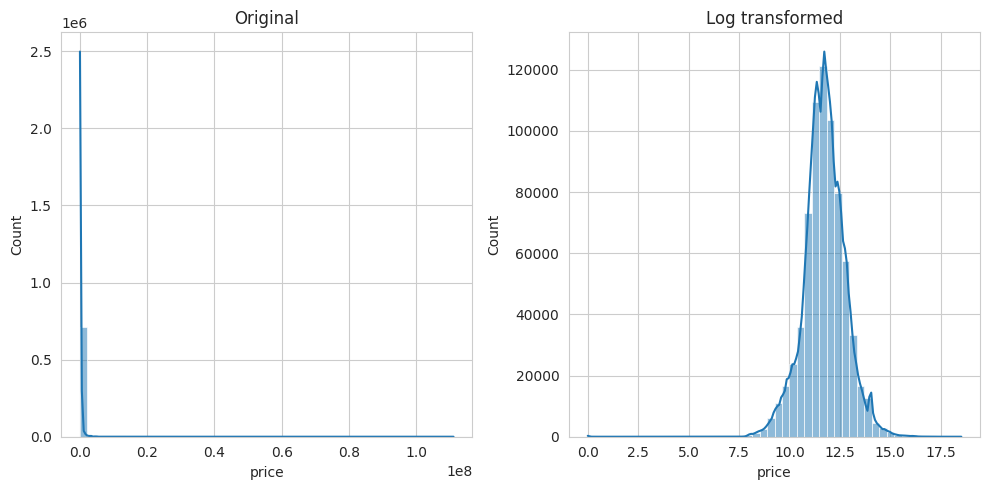

In [28]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

# Histograma original
plt.subplot(1, 2, 1)
sns.histplot(data_ar['price'], bins=50, kde=True)
plt.title('Original')

# Histograma con log1p
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(data_ar['price']), bins=50, kde=True)
plt.title('Log transformed')

plt.tight_layout()

Insight distribución original:

* Hay un **sesgo positivo** porque hay una alta concentración de precios bajos, y valores extremadamente altos (outliers) que estiran la escala hacia la derecha.

Exploración de outliers

In [29]:
print( data_ar['price'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1))

print(print(f"Cantidad de outliers por encima del P99: {(data_ar['price'] > data_ar['price'].quantile(0.99)).sum()}")
)

count       715516.0
mean        222959.0
std         505612.1
min              0.0
1%            8967.0
10%          37000.0
20%          60000.0
30%          79000.0
40%          99000.0
50%         125000.0
60%         155000.0
70%         200000.0
80%         280000.0
90%         430000.0
99%        1600000.0
max      111111111.0
Name: price, dtype: float64
Cantidad de outliers por encima del P99: 7005
None


Insight:
Hay un cambio abrupto de 1.500.000 a 111.0000.000 que explica la distribución altamente sesgada. Por ultimo, son 5913 propiedades por encima P99.

Acción futura: realizar la transformación logaritmica a price.

In [30]:
data_ar[data_ar['price'] == 0].shape

(142, 22)

In [31]:
#se elimina las propiedades ==0
data_ar = data_ar[data_ar['price'] > 0]


## Variables discretas

Tipo de datos

In [32]:
data_ar.dtypes

,0
id,object
ad_type,object
start_date,object
end_date,object
created_on,object
lat,float64
lon,float64
país,object
provincia,object
localidad,object


In [33]:
data_ar["bathrooms"] = data_ar["bathrooms"].astype("Int64")
data_ar["rooms"] = data_ar["rooms"].astype("Int64")
data_ar["bedrooms"] = data_ar["bedrooms"].astype("Int64")

### rooms

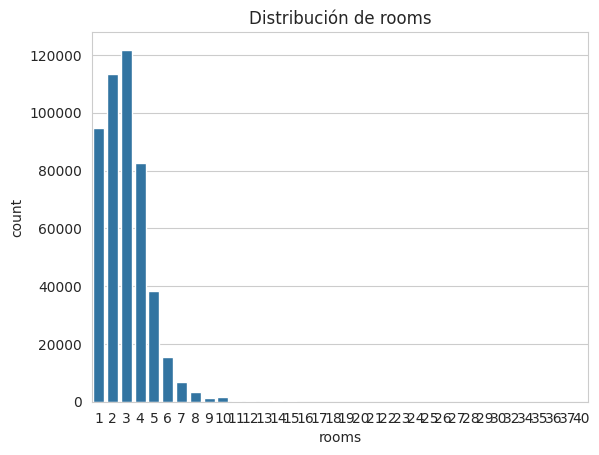

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot para valores enteros
sns.countplot(x=data_ar["rooms"])
plt.title("Distribución de rooms")
plt.show()

Insight:

Distribución sesgada a la izquierda(positiva), porque la mayoria de propiedades tiene entre 1 y 5 habitaciones. A partir de 6, la frecuencia cae.

Outliers a la derecha: como vimos en el discribe() y acá se confirma hay propiedades con hasta 40 habitaciones.

El número de propiedades con más de 6 habitaciones es muy bajo.

Exploración outliers

In [35]:
print(data_ar['rooms'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1)
)

print(f"Cantidad de outliers por encima del P99: {(data_ar['rooms'] > data_ar['rooms'].quantile(0.99)).sum()}")


count    480118.0
mean          3.0
std           1.7
min           1.0
1%            1.0
10%           1.0
20%           2.0
30%           2.0
40%           2.0
50%           3.0
60%           3.0
70%           4.0
80%           4.0
90%           5.0
99%           8.0
max          40.0
Name: rooms, dtype: Float64
Cantidad de outliers por encima del P99: 3859


Insight:
* El 99% de las propiedades tienen ≤ 7 rooms y hay un cambio abrupto hacia 40 rooms.

* Hay 6.079 outliers por encima del percentil 99 (P99), lo que representa solo el 1% del total.


### bedrooms

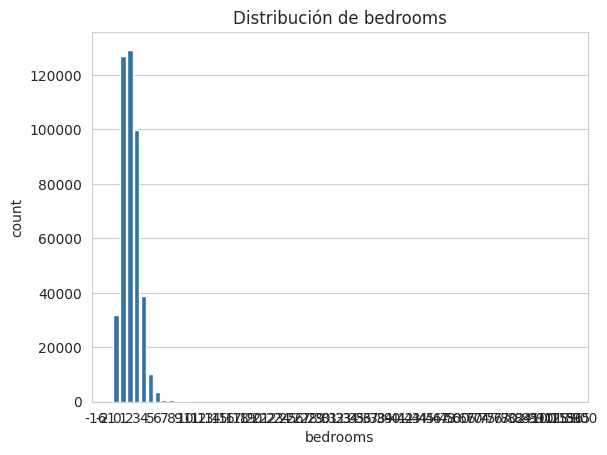

In [36]:
sns.countplot(x=data_ar["bedrooms"])
plt.title("Distribución de bedrooms")
plt.show()

**Exploración outliers**

In [37]:
print(data_ar['bedrooms'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1))

print(f"Cantidad de outliers por encima del P99: {(data_ar['bedrooms'] > data_ar['bedrooms'].quantile(0.99)).sum()}")


count    442487.0
mean          2.1
std           2.2
min         -16.0
1%            0.0
10%           1.0
20%           1.0
30%           1.0
40%           2.0
50%           2.0
60%           2.0
70%           3.0
80%           3.0
90%           4.0
99%           6.0
max         900.0
Name: bedrooms, dtype: Float64
Cantidad de outliers por encima del P99: 2061


Insight:
Nos encontramos con una sesgo positivo.
* Valores negativos: -16
* Valores outliers: 900

In [38]:
# Eliminar filas con valores negativos en 'bedrooms'
data_ar = data_ar[data_ar["bedrooms"] >= 0]


### bathrooms

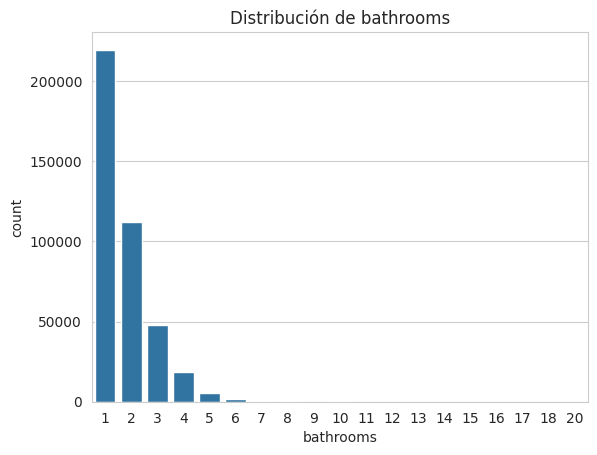

In [39]:
sns.countplot(x=data_ar["bathrooms"])
plt.title("Distribución de bathrooms")
plt.show()

Insight:

Distribución con sesgo positivo. Porque la mayoria de las propiedades tienen entre 1 y 2 baños. Pero encontramos en una 20 baños, lo cual es un outlier.

**Exploración outliers**

In [40]:
print(data_ar['bathrooms'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1))

print(f"Cantidad de outliers por encima del P99: {(data_ar['bathrooms'] > data_ar['bathrooms'].quantile(0.99)).sum()}")


count    406903.0
mean          1.7
std           1.1
min           1.0
1%            1.0
10%           1.0
20%           1.0
30%           1.0
40%           1.0
50%           1.0
60%           2.0
70%           2.0
80%           2.0
90%           3.0
99%           5.0
max          20.0
Name: bathrooms, dtype: Float64
Cantidad de outliers por encima del P99: 3152


## Variables continuas

In [41]:
data_ar[['surface_covered','surface_total']].isnull().mean()*100

,0
surface_covered,53.235612
surface_total,56.317319


Ambas variables tienen más del 50% de Nan

### surface_covered

In [42]:
data_ar.surface_covered.describe().round(1)

,surface_covered
count,206924.0
mean,270.6
std,34633.6
min,-2.0
25%,52.0
50%,82.0
75%,159.0
max,11111111.0


Insight: Surface_covered tiene una distribución muy sesgada por que el valor max 600.000.000 que puede ser un outlier o error de carga.


In [43]:
print(data_ar['surface_covered'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1))

print(f"Cantidad de outliers por encima del P99: {(data_ar['surface_covered'] > data_ar['surface_covered'].quantile(0.99)).sum()}")


count      206924.0
mean          270.6
std         34633.6
min            -2.0
1%             27.0
10%            40.0
20%            47.0
30%            57.0
40%            69.0
50%            82.0
60%           104.0
70%           139.0
80%           180.0
90%           250.0
99%           553.0
max      11111111.0
Name: surface_covered, dtype: float64
Cantidad de outliers por encima del P99: 2068


Insight:
* El percentil 99% indica que el 99% de las propiedades tienen una superficie cubierta menor o igual a 530 m².

* Tambien significa que solo el 1% de los datos está por encima de 530 m², que son 6080 propiedades.

In [44]:
#eliminar valores negativos
data_ar = data_ar[data_ar["surface_covered"] >= 0]


### surface_total

In [45]:
data_ar['surface_total'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1)


,surface_total
count,186224.0
mean,257.6
std,2177.5
min,10.0
1%,29.0
10%,43.0
20%,52.0
30%,63.0
40%,76.0
50%,95.0


In [46]:
print(f"Cantidad de outliers por encima del P99: {(data_ar['surface_total'] > data_ar['surface_total'].quantile(0.99)).sum()}")


Cantidad de outliers por encima del P99: 1835


Insight:
* El percentil 99% indica que el 99% de las propiedades tienen una superficie cubierta menor o igual a 1200m2.

* Tambien significa que solo el 1% de los datos está por encima de 1200m2, que son 6044 propiedades.

## Coordenadas: latitud y longitud

In [47]:
#corroborrar los tipos de dato de lat y lon
data_ar[['lat','lon']].dtypes

,0
lat,float64
lon,float64


In [48]:
for col in ['lat', 'lon']:
    print(f"{col}: Total Filas = {len(data_ar)}, Valores Nulos = {data_ar[col].isnull().sum()}, Porcentaje = {data_ar[col].isnull().mean() * 100:.2f}%")

lat: Total Filas = 206923, Valores Nulos = 23815, Porcentaje = 11.51%
lon: Total Filas = 206923, Valores Nulos = 23815, Porcentaje = 11.51%


In [49]:
#ver el resumen estadistico de lat y lon
data_ar[['lat','lon']].describe()

,lat,lon
count,183108.000000,183108.000000
mean,-34.418913,-59.177944
std,1.448947,2.137055
min,-54.831678,-72.886325
25%,-34.626975,-58.703165
50%,-34.584212,-58.485058
75%,-34.446298,-58.418238
max,-22.050635,-53.647482


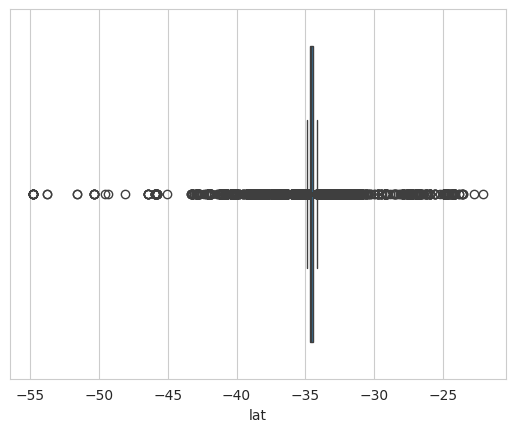

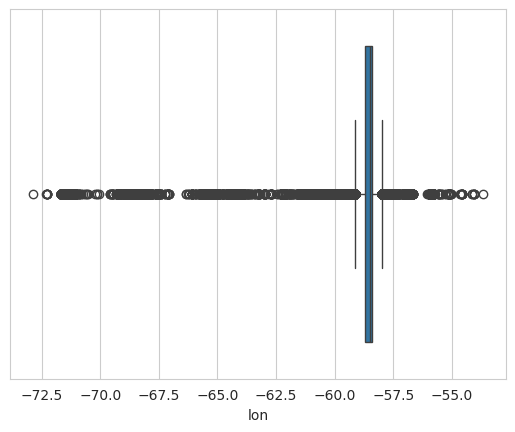

In [50]:
#visualización la distribución
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data_ar['lat'])
plt.show()

sns.boxplot(x=data_ar['lon'])
plt.show()

Insight: Podemos ver que tambien hay datos erroneos de los rangos geográficos aproximados de latitud (lat) y longitud (lon) en Argentina.

Se ve una latitud como 49.6 Está por el Europa(Canada)

Una longitud como 8.3 está en Europa (Alemania).

Y -122 está en el Pacífico (California, USA).

¿Cuantas propiedades estan fuera de Argentina?


In [51]:
# Crear una copia del DataFrame original
df_clean = data_ar.copy()

#Rango de coordenadas válidas de Argentina
lat_val = df_clean['lat'].between(-55, -21.5)
lon_val = df_clean['lon'].between(-73.5, -53.5)

#Filtramos propiedades que tienen la lat y lon fuera de Argentina
lat_outliers= df_clean[~lat_val]
lon_outliers= df_clean[~lon_val]

#cantidad de outliers
print('Latitudes fuera de Argentina', len(lat_outliers))
print('Longitudes fuera de Argentina',len(lon_outliers))

Latitudes fuera de Argentina 23815
Longitudes fuera de Argentina 23815


Tratamiento de georeferenciación de inmuebles

In [52]:
import numpy as np
# Reemplazamos las cordenadas que estan mal por NaN
df_clean.loc[~lat_val, 'lat'] = np.nan
df_clean.loc[~lon_val, 'lon'] = np.nan

In [53]:
#calculamos las medianas por barrio
medianas_loc= df_clean.groupby('localidad')[['lat','lon']].median()

print(medianas_loc)

                      lat        lon
localidad                           
9 de Julio            NaN        NaN
Abasto         -34.603890 -58.410998
Agrelo         -33.167570 -68.920060
Agronomía      -34.593984 -58.490029
Agua de Oro    -31.062190 -64.300371
...                   ...        ...
Zavalla        -33.024810 -60.884534
Zonda          -31.551870 -68.721364
Zárate         -34.097755 -59.022160
Álvarez        -33.126195 -60.714436
Ángel Gallardo -31.559668 -60.677243

[505 rows x 2 columns]


Se imputa con mediana de los barrios calculados los coordenadas malas(que ahora son NaN)

In [54]:
# 1.Se establece el indice en 'localidad' para que sea más fácil cruzar con medianas_loc
df_clean.set_index("localidad", inplace=True)

# 2. Rellena los NaN de lat y lon con la mediana del barrio (según el índice actual)
df_clean[["lat", "lon"]] = df_clean[["lat", "lon"]].fillna(medianas_loc)

In [55]:
# 3. Devuelve 'localidad' a una columna normal (ya no como índice)
df_clean.reset_index(inplace=True)

Sintesis: Se corrige las coordenadas incorrectas(outliers) usando la ubicación típica del barrio.

## Variables categoricas

In [56]:
print(data_ar['provincia'].nunique())

print(data_ar['localidad'].nunique())

print(data_ar['property_type'].nunique())


26
505
10


In [57]:
#tipo de propiedades
data_ar.property_type.value_counts()

,count
property_type,
Departamento,116262
Casa,71138
PH,15698
Otro,1569
Lote,758
Oficina,669
Local comercial,386
Casa de campo,375
Depósito,56


A raiz que en las indagación de las variables categorias algunas tenian 0:

In [58]:
print(data_ar[data_ar['rooms'] == 0]['property_type'].value_counts())

print(data_ar[data_ar['bedrooms'] == 0]['property_type'].value_counts())

print(data_ar[data_ar['bathrooms'] == 0]['property_type'].value_counts())


Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


In [59]:
# Frecuencia absoluta
frecuencia_abs = data_ar['provincia'].value_counts()

# Frecuencia relativa (%)
frecuencia_rel = data_ar['provincia'].value_counts(normalize=True) * 100

tabla_provincia = pd.DataFrame({
    'Frecuencia absoluta': data_ar['provincia'].value_counts(),
    'Frecuencia relativa (%)': data_ar['provincia'].value_counts(normalize=True).round(2) * 100
}).sort_values(by='Frecuencia absoluta', ascending=False)

print(tabla_provincia)

                              Frecuencia absoluta  Frecuencia relativa (%)
provincia                                                                 
Capital Federal                             81445                     39.0
Bs.As. G.B.A. Zona Norte                    53094                     26.0
Bs.As. G.B.A. Zona Sur                      19795                     10.0
Santa Fe                                    16559                      8.0
Bs.As. G.B.A. Zona Oeste                    14348                      7.0
Córdoba                                      6029                      3.0
Buenos Aires Costa Atlántica                 5135                      2.0
Neuquén                                      2544                      1.0
Buenos Aires Interior                        2255                      1.0
Río Negro                                    1179                      1.0
Mendoza                                      1069                      1.0
Tucumán                  

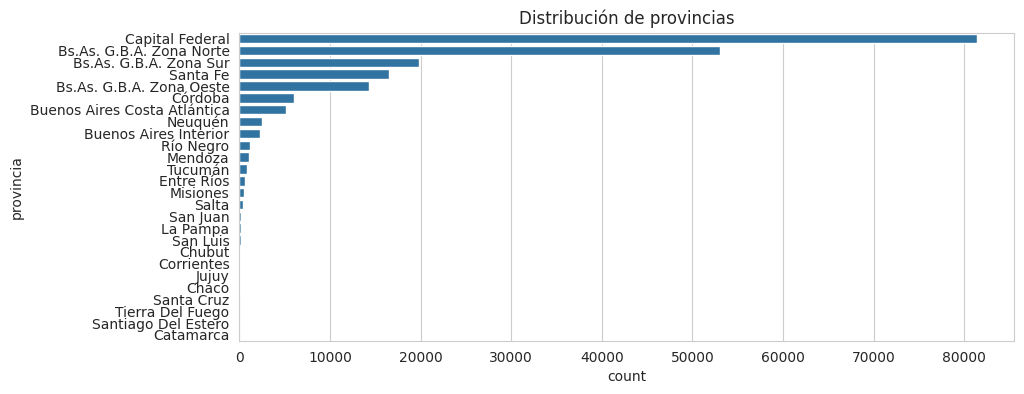

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.countplot(y='provincia', data=data_ar, order=data_ar['provincia'].value_counts().index)
plt.title("Distribución de provincias")
plt.show()


Insight:
1. Alta concentración en pocas provincias (desbalance)
Capital Federal (CABA) concentra el 39% de los registros (81,445 propiedades).

Sumando las tres zonas del Gran Buenos Aires (GBA):
Zona Norte: 26%
Zona Sur: 10%
Zona Oeste: 7%
🔹 Total GBA = 43%

📌 Entre CABA y GBA concentran el 82% de las propiedades del dataset.

2. Provincia de interior con baja representación.
* Santa Fe y Cordoba son las provincias con cierta relevancia:
Santa Fe: 8%

Córdoba: 3%


3. Categoria con frecuencia baja (menor a 100 registros)
* Podria significar riesgo alto de overfitting si el modelo aprende de estas zonas

<Axes: xlabel='count', ylabel='localidad'>

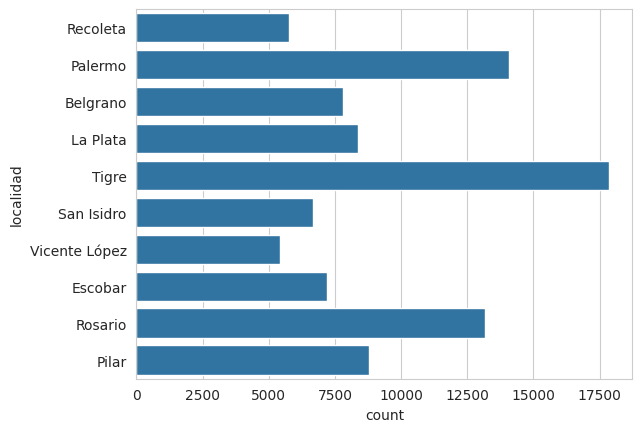

In [61]:
top_localidades = data_ar['localidad'].value_counts().nlargest(10).index
sns.countplot(data=data_ar[data_ar['localidad'].isin(top_localidades)], y='localidad')


## Analisis bivariado

In [62]:
#variables numericas
numericas = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']

# Calculá la matriz de correlación de Pearson
print(data_ar[numericas].corr(method='pearson'))


                    rooms  bedrooms  bathrooms  surface_total  \
rooms            1.000000  0.831308   0.648040       0.071757   
bedrooms         0.831308  1.000000   0.390880       0.048728   
bathrooms        0.648040  0.390880   1.000000       0.084292   
surface_total    0.071757  0.048728   0.084292       1.000000   
surface_covered  0.001108  0.001441   0.000510       0.246706   
price            0.339349  0.225631   0.521654       0.063704   

                 surface_covered     price  
rooms                   0.001108  0.339349  
bedrooms                0.001441  0.225631  
bathrooms               0.000510  0.521654  
surface_total           0.246706  0.063704  
surface_covered         1.000000  0.000586  
price                   0.000586  1.000000  


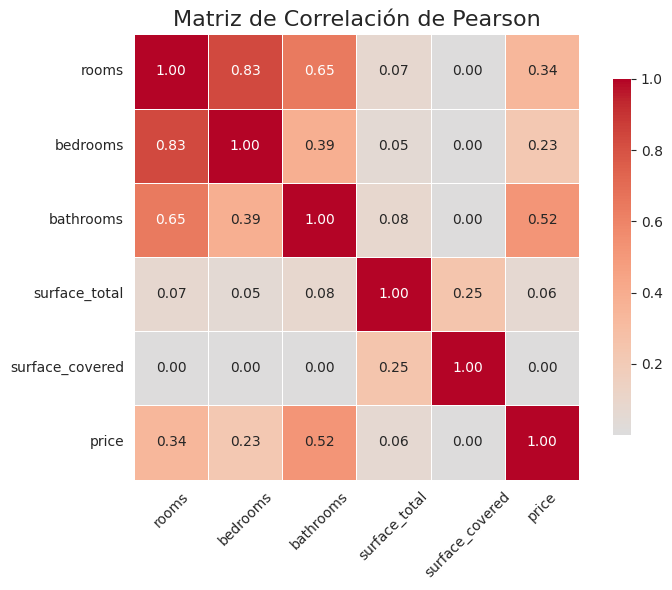

In [63]:
cols = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
corr_matrix = data_ar[cols].corr(method='pearson')  # Pearson es el valor por defecto

plt.figure(figsize=(8, 6))

# 3. Graficá con seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})

plt.title('Matriz de Correlación de Pearson', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Insights:

* Multicolinealidad: Hay variables muy correlacionadas entre sí (rooms y bedrooms). Podría ser conveniente elegir solo una para evitar redundancia o usar técnicas que lo controlen (p.ej. regularización).

* Variables con baja correlación al precio: surface_covered, surface_total tienen muy poca correlación.
Su efecto lineal sobre el precio es casi nulo. Esto no significa que no sean útiles, pero su relación no es lineal y/o podrían necesitar transformación o combinación con otras variables.

* Variables con alta correlación al precio: baños, rooms y bedrooms parecen ser las variables más importantes linealmente.

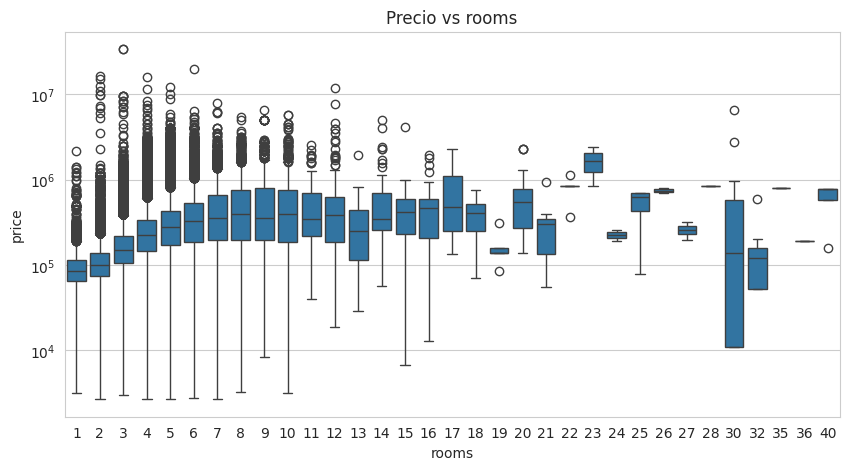

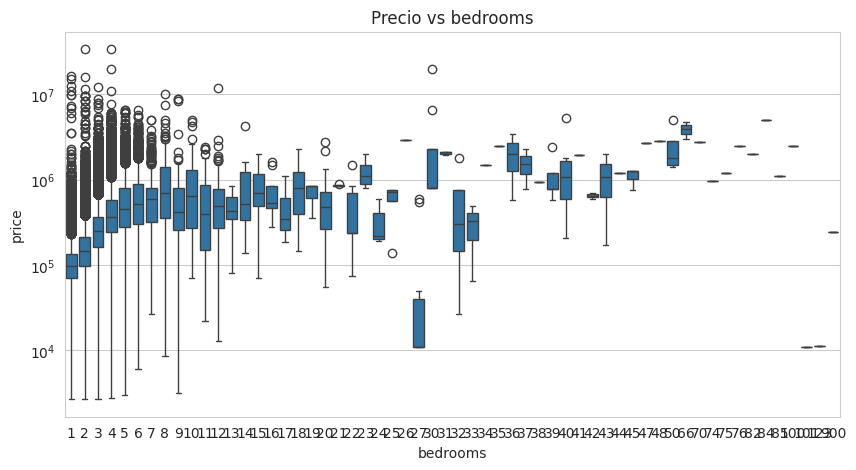

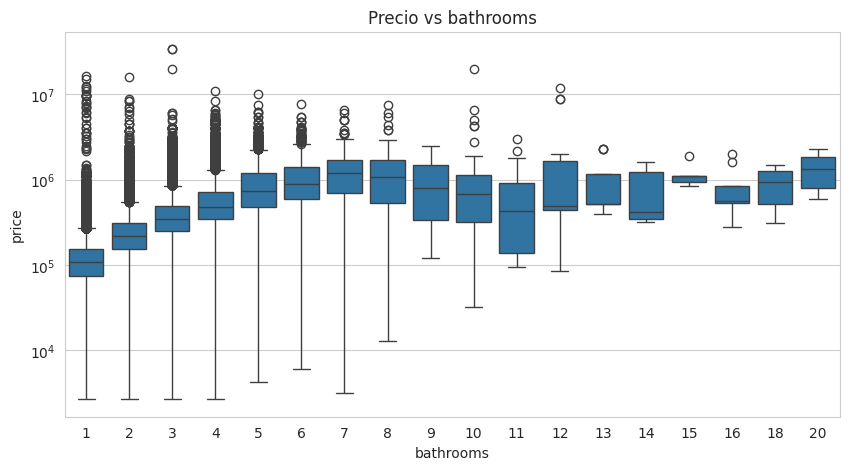

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

discrete_vars = ['rooms', 'bedrooms', 'bathrooms']

for var in discrete_vars:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=data_ar[var], y=data_ar['price'])
    plt.title(f'Precio vs {var}')
    plt.yscale('log')  # Opcional para ver mejor la dispersión
    plt.show()


Insight:

**1. Precio vs rooms**

* De 1 a 10 rooms, hay una tendencia clara de aumento del precio, aunque con mucha dispersión. A partir de rooms > 10, los datos se vuelven erráticos, probablemente porque hay muy pocos casos por categoría.

* rooms = 28, 30, 32, 35, 36, 40 tienen muy pocos registros → alta varianza, poco confiables.

* **Acción futura:** para el modelo capear rooms a 10 0 12

**2. Precio vs bedrooms**
Hasta bedrooms ≈ 8, se nota un patrón creciente, pero luego:

* Presencia fuerte de valores extremos, especialmente desde bedrooms = 20 hasta 900.
Algunos valores como bedrooms = 0, 100, 300, 900 → claramente erróneos o cargados mal.

* Conclusión: hay una distribución anomala por los valores extremos. Hay una relación debil con price pero no aleatoria: más dormitorios tiende a elevar precio hasta cierto punto.

**2. Precio vs bathrooms**

* A mayor cantidad de baños, mayor mediana y rango de precios. A partir de bathrooms > 10, nuevamente los datos son escasos y dispersos.

* Conclusión: Dispersión lógica, valida lo que vimos conn Pearson(correlación más alta con Price). Considerar capping en 10 para modelos más robustos.



Variables continuas

La correlación de Pearson es baja, pero podrían tener relaciones no lineales con el preci

In [65]:
print(data_ar[['surface_covered', 'surface_total']].describe(percentiles=[0.95, 0.98, 0.99, 0.995, 0.999]).round(1))


       surface_covered  surface_total
count         206923.0       186224.0
mean             270.6          257.6
std            34633.7         2177.5
min                1.0           10.0
50%               82.0           95.0
95%              330.0          664.0
98%              448.6         1050.0
99%              553.0         1600.0
99.5%            750.0         3000.0
99.9%           4688.4        20000.0
max         11111111.0       200000.0


In [66]:
data_ar[['price', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']].corr(method='spearman')


,price,rooms,bedrooms,bathrooms,surface_total,surface_covered
price,1.000000,0.546897,0.626527,0.705432,0.646534,0.703068
rooms,0.546897,1.000000,0.925763,0.665863,0.817311,0.855102
bedrooms,0.626527,0.925763,1.000000,0.733719,0.810536,0.852536
bathrooms,0.705432,0.665863,0.733719,1.000000,0.712019,0.761500
surface_total,0.646534,0.817311,0.810536,0.712019,1.000000,0.934905
surface_covered,0.703068,0.855102,0.852536,0.761500,0.934905,1.000000


Insight:

En la correlación de Pearson subestima variables importantes (surface_total, surface_covered, bedrooms). Pero Spearman muestra que hay una tendencia creciente clara: a mayor valor de la variable, mayor suele ser el precio —aunque no de forma proporcional.

* Surface total: Relación no lineal fuerte según Spearman. Usar tal cual o escalar.

* Surface_covered: Hay fuerte patrón (ρ = 0.70) más que superficie total, pero requiere limpieza (outliers enormes).

Estas dos variables de superficie tienen alta correlación (ρ = 0.93).

* bedrooms: Buena correlación monotónica. Capear > 20


Conclusión:
 Esto confirma que el precio está influido por varios factores de forma no lineal,

Acción futura: Estas variables necesatan limpieza. El modelo debería ser capaz de captarlas usando por ejemplo arboles de decisión, random forest, XGBoost

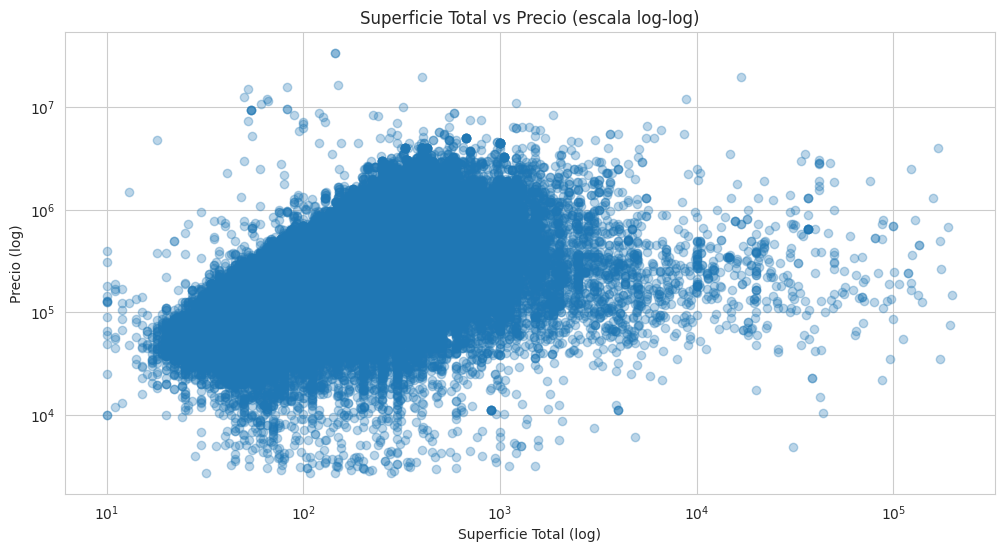

In [67]:
plt.figure(figsize=(12, 6))
plt.scatter(data_ar['surface_total'], data_ar['price'], alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.title('Superficie Total vs Precio (escala log-log)')
plt.xlabel('Superficie Total (log)')
plt.ylabel('Precio (log)')
plt.show()


Insight:

1. Relación débil pero positiva en rangos bajos-medios:

En la parte inferior izquierda (superficie entre 10² y 10³, o sea de 100 a 1000 m²), se ve una tendencia positiva leve: a más superficie, más probabilidad de tener mayor precio. Sin embargo, esta relación se diluye en superficies grandes.

2. Presencia de outliers identificables: Los puntos alejados del nucleo denso son outleirs

### categoricas vs price

In [68]:
import numpy as np
from scipy.stats import f_oneway

grupos = [
    np.log1p(grupo['price'].values)
    for _, grupo in data_ar[['provincia', 'price']].dropna().groupby('provincia')
]
f_stat, p_value = f_oneway(*grupos)
print(f"ANOVA con price_log - F: {f_stat:.2f} | p-value: {p_value:.4f}")


ANOVA con price_log - F: 1571.89 | p-value: 0.0000


Insight:

F = 1571.89 → Es un número grande. Significa que hay muchísima diferencia entre los grupos comparado con lo que hay dentro de cada provincia.

Por lo que según la localidad si cambia mucho el precio. La variable categorica provincia tiene una relación significativa con price_log.



¿Qué tan diferentes son los promedios de price_log entre localidades?

In [69]:

# Filtrar solo localidades con muchos registros (ejemplo: Top 20)
top_localidades = data_ar['localidad'].value_counts().nlargest(20).index

# Subset temporal sin modificar df original
df_anova = data_ar[data_ar['localidad'].isin(top_localidades)].dropna(subset=['price'])

# Agrupar price_log en línea (sin modificar columnas)
grupos = [
    np.log1p(grupo['price'].values)
    for _, grupo in df_anova.groupby('localidad')
]

# Ejecutar ANOVA
f_stat, p_value = f_oneway(*grupos)
print(f"ANOVA (localidad vs. price_log) - F: {f_stat:.2f} | p-value: {p_value:.4f}")


ANOVA (localidad vs. price_log) - F: 2647.79 | p-value: 0.0000


In [70]:
# Calcular media general
media_total = np.log1p(df_anova['price']).mean()

# Suma total de cuadrados (SST)
sst = ((np.log1p(df_anova['price']) - media_total) ** 2).sum()

# Suma de cuadrados entre grupos (SSB)
ssb = df_anova.groupby('localidad').apply(
    lambda g: len(g) * (np.log1p(g['price']).mean() - media_total) ** 2
).sum()

eta_squared = ssb / sst
print(f"Eta² (proporción de varianza explicada por localidad): {eta_squared:.4f}")


Eta² (proporción de varianza explicada por localidad): 0.2770


/tmp/ipython-input-70-2538093621.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssb = df_anova.groupby('localidad').apply(


Insight:

1. F: 2647.79.  La variación del precio promedio entre localidades es 2647 veces más grande que la variación interna dentro de las localidades. Para el negocio, indica:

* El precio (price) no se comporta igual en todas las localidades.

* Hay localidades mucho más caras o más baratas que otras → hay zonas premium, zonas accesibles, etc.

2. Eta²: 0.2770. 27.7% del comportamiento del precio puede explicarse solo por la localidad.




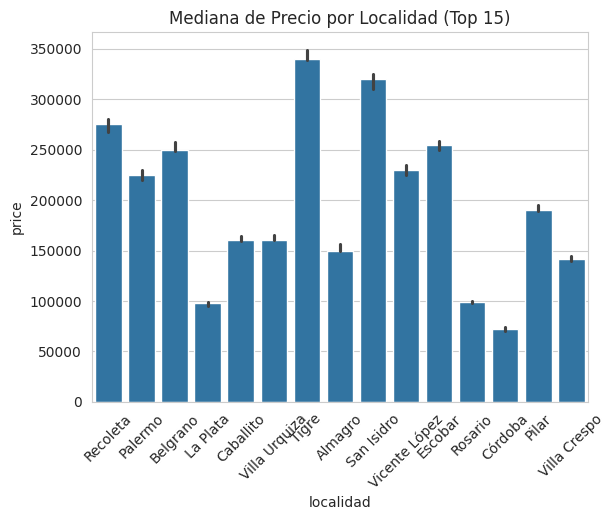

In [71]:
top_localidades = data_ar['localidad'].value_counts().nlargest(15).index
df_top = data_ar[data_ar['localidad'].isin(top_localidades)]

sns.barplot(x='localidad', y='price', data=df_top, estimator=np.median)
plt.xticks(rotation=45)
plt.title('Mediana de Precio por Localidad (Top 15)')
plt.show()


Insight:

1. Localidades con mayor precio mediano: Tigre, Almagro y San Isidro precios por encima de 300.000. Estas zonas son de valor inombiliario alto
- Tigre muestra mayor dispersión , sugiere mayor heterogeneidad en precios dentro de Tigre.

2. Localidades con menor precio mediano: Córdoba, Rosario, Escobar y Pilar están en el rango de 70,000 a 100,000.



¿El precio en una localidad varía según el tipo de propiedad?

In [72]:
grupos_property = [
    np.log1p(grupo['price'].values)
    for _, grupo in data_ar[['property_type', 'price']].dropna().groupby('property_type')
]
f_stat, p_value = f_oneway(*grupos_property)
print(f"ANOVA con price_log - F: {f_stat:.2f} | p-value: {p_value:.4f}")

ANOVA con price_log - F: 1417.46 | p-value: 0.0000


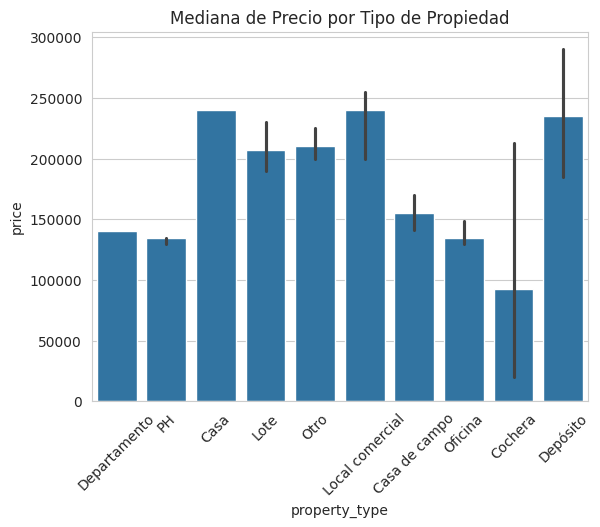

In [73]:
sns.barplot(x='property_type', y='price', data=data_ar, estimator=np.median)
plt.title('Mediana de Precio por Tipo de Propiedad')
plt.xticks(rotation=45)
plt.show()


Insight:

1. Casas y casas en country tienen el precio mediano más alto

2. Departamentos y PH tienen precios más bajos

3. Cochera, oficina y local tienen menor precio: Particularmente cochera muestra un precio muy bajo, con una gran dispersión.

4. Outliers y dispersión interna: Las barras con líneas negras más largas (como Depósito u Oficina) indican que hay más variabilidad interna, es decir, propiedades con precios muy distintos dentro del mismo tipo.

# Conclusiones EDA


Variables seleccionadas para el modelo:

Objetivo (target): price

Categóricas: provincia, localidad, property_type

Coordenadas: lat, lon

Discretas: rooms, bedrooms, bathrooms

Continuas:  surface_covered (con alta cantidad de nulos pero tiene un poco mayor de relación con price, que superficie total)

Posibles a descartadar:

* bedrooms porque tiene alta correlación con rooms, lo que puede confundir al modelo

* surface_total, por gran cantidad de nulos y relación debil, execeso de outliers. Tambien tiene alta correlación (ρ = 0.93) con surface_covered, lo que podría ser redundante para el modelo.

In [74]:
data_ar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206923 entries, 90 to 984076
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               206923 non-null  object 
 1   ad_type          206923 non-null  object 
 2   start_date       206923 non-null  object 
 3   end_date         206923 non-null  object 
 4   created_on       206923 non-null  object 
 5   lat              183108 non-null  float64
 6   lon              183108 non-null  float64
 7   país             206923 non-null  object 
 8   provincia        206923 non-null  object 
 9   localidad        203183 non-null  object 
 10  rooms            178651 non-null  Int64  
 11  bedrooms         206923 non-null  Int64  
 12  bathrooms        205278 non-null  Int64  
 13  surface_total    186224 non-null  float64
 14  surface_covered  206923 non-null  float64
 15  price            206923 non-null  float64
 16  currency         206923 non-null  object 


In [75]:
# se convierte Int64 a float para evitar problemas de incompatibilidad con scikit-learn
data_ar[['rooms','bedrooms', 'bathrooms']] = data_ar[['rooms','bedrooms','bathrooms']].astype('float64')

In [76]:
# Lista de variables seleccionadas
vars_modelo = [
    "price",               # Objetivo
    "provincia", "localidad", "property_type",  # Categóricas
    "lat", "lon",                              # Coordenadas
    "rooms","bedrooms", "bathrooms",                      # Discretas
    "surface_total","surface_covered"         # Continuas
]

# Subset del DataFrame original
df_modelo = data_ar[vars_modelo].copy()


In [77]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206923 entries, 90 to 984076
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   price            206923 non-null  float64
 1   provincia        206923 non-null  object 
 2   localidad        203183 non-null  object 
 3   property_type    206923 non-null  object 
 4   lat              183108 non-null  float64
 5   lon              183108 non-null  float64
 6   rooms            178651 non-null  float64
 7   bedrooms         206923 non-null  float64
 8   bathrooms        205278 non-null  float64
 9   surface_total    186224 non-null  float64
 10  surface_covered  206923 non-null  float64
dtypes: float64(8), object(3)
memory usage: 18.9+ MB


# Ingenieria de variables

In [78]:
print(df_modelo['price'].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1))

print(f"Cantidad de outliers por encima del P99: {(df_modelo['price'] > df_modelo['price'].quantile(0.99)).sum()}")


count      206923.0
mean       257060.2
std        362874.3
min          2684.6
1%          30000.0
10%         67050.6
20%         89000.0
30%        111111.0
40%        135000.0
50%        165000.0
60%        200000.0
70%        255000.0
80%        335000.0
90%        490000.0
99%       1600000.0
max      33918902.0
Name: price, dtype: float64
Cantidad de outliers por encima del P99: 2038


Insight:
Hay un cambio abrupto de 1.500.000 a 111.0000.000 que explica la distribución altamente sesgada. Por ultimo, son 5913 propiedades por encima P99.

In [79]:
# Price: se capea al percentil 99
p99 = df_modelo['price'].quantile(0.99)  # P99 = 7.0
df_modelo['price'] = df_modelo['price'].apply(lambda x: p99 if x > p99 else x)

In [80]:
df_modelo[['rooms','bedrooms','bathrooms','surface_covered','surface_total']].describe(percentiles=[0.01] + [i/10 for i in range(1, 10)] + [0.99]).round(1)


,rooms,bedrooms,bathrooms,surface_covered,surface_total
count,178651.0,206923.0,205278.0,206923.0,186224.0
mean,3.4,2.4,1.8,270.6,257.6
std,1.7,2.5,1.1,34633.7,2177.5
min,1.0,1.0,1.0,1.0,10.0
1%,1.0,1.0,1.0,27.0,29.0
10%,2.0,1.0,1.0,40.0,43.0
20%,2.0,1.0,1.0,47.0,52.0
30%,2.0,2.0,1.0,57.0,63.0
40%,3.0,2.0,1.0,69.0,76.0
50%,3.0,2.0,1.0,82.0,95.0


In [81]:
# Lista de variables numéricas que querés capear
cols_to_cap = ['rooms', 'bedrooms', 'bathrooms', 'surface_covered', 'surface_total']
# Calcular el percentil 99 para cada columna
p99 = df_modelo[cols_to_cap].quantile(0.99)

# Aplicar el capping al percentil 99
for col in cols_to_cap:
    df_modelo[col] = df_modelo[col].clip(upper=p99[col])

# Separación en train y test

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

In [83]:
# Definir matriz de atributos y vector de objetivos
X = df_modelo.drop(columns=["price"])
y = df_modelo["price"]

In [84]:
X.head(3)

,provincia,localidad,property_type,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
90,Capital Federal,Recoleta,Departamento,-34.589005,-58.398612,2.0,1.0,1.0,60.0,60.0
113,Buenos Aires Costa Atlántica,Costa Azul,PH,-36.672641,-56.683763,2.0,1.0,1.0,84.0,39.0
115,Bs.As. G.B.A. Zona Oeste,Hurlingham,Casa,-34.615851,-58.642389,2.0,1.0,1.0,111.0,111.0


In [85]:
# 5. Separación en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Transformaciones

In [86]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206923 entries, 90 to 984076
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   price            206923 non-null  float64
 1   provincia        206923 non-null  object 
 2   localidad        203183 non-null  object 
 3   property_type    206923 non-null  object 
 4   lat              183108 non-null  float64
 5   lon              183108 non-null  float64
 6   rooms            178651 non-null  float64
 7   bedrooms         206923 non-null  float64
 8   bathrooms        205278 non-null  float64
 9   surface_total    186224 non-null  float64
 10  surface_covered  206923 non-null  float64
dtypes: float64(8), object(3)
memory usage: 18.9+ MB


### Imputación

In [87]:
df_modelo.isnull().sum()

,0
price,0
provincia,0
localidad,3740
property_type,0
lat,23815
lon,23815
rooms,28272
bedrooms,0
bathrooms,1645
surface_total,20699


In [88]:
df_modelo.isnull().mean().mul(100)

,0
price,0.000000
provincia,0.000000
localidad,1.807436
property_type,0.000000
lat,11.509112
lon,11.509112
rooms,13.663053
bedrooms,0.000000
bathrooms,0.794982
surface_total,10.003238


In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

#imputación : rooms, bathrooms, surface_total
num_vars = ['rooms', 'bathrooms', 'surface_total']

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test_scaled[num_vars] = scaler.transform(X_test[num_vars])

# Aplicamos KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_train_scaled[num_vars] = imputer.fit_transform(X_train_scaled[num_vars])
X_test_scaled[num_vars] = imputer.transform(X_test_scaled[num_vars])

# Desescalamos (opcional)
X_train[num_vars] = scaler.inverse_transform(X_train_scaled[num_vars])
X_test[num_vars] = scaler.inverse_transform(X_test_scaled[num_vars])

In [90]:
# 1. Calcular la moda de 'localidad' por 'provincia' en el set de entrenamiento
moda_localidad_train = (
    X_train.loc[X_train['localidad'].notnull()]
    .groupby('provincia')['localidad']
    .agg(lambda x: x.mode().iloc[0])
)

# 2. Función para imputar una fila
def imputar_localidad(row):
    if pd.isnull(row['localidad']):
        return moda_localidad_train.get(row['provincia'], 'missing')  # backup si no está en el dict
    else:
        return row['localidad']

# 3. Aplicar a ambos sets por separado
X_train['localidad'] = X_train.apply(imputar_localidad, axis=1)
X_test['localidad'] = X_test.apply(imputar_localidad, axis=1)

In [91]:
print("Cantidad de 'missing' en localidad:")

print("X_train:", (X_train['localidad'] == 'missing').sum())
print("X_test: ", (X_test['localidad'] == 'missing').sum())

Cantidad de 'missing' en localidad:
X_train: 0
X_test:  0


Se va imputar la latitud y longitud usando la mediana por la localidad.En el caso que se encuentre con nulos, se la intera reemplazar con la mediana de la provincia.

In [92]:
# 1. Crear mapas de mediana de lat/lon por localidad usando solo X_train
mediana_lat = X_train.groupby('localidad')['lat'].median()
mediana_lon = X_train.groupby('localidad')['lon'].median()

# 2. Medianas por provincia (backup)
mediana_lat_provincia = X_train.groupby('provincia')['lat'].median()
mediana_lon_provincia = X_train.groupby('provincia')['lon'].median()

# 2. Imputar en X_train
X_train['lat'] = X_train['lat'].fillna(X_train['localidad'].map(mediana_lat))
X_train['lat'] = X_train['lat'].fillna(X_train['provincia'].map(mediana_lat_provincia))


X_train['lon'] = X_train['lon'].fillna(X_train['localidad'].map(mediana_lon))
X_train['lon'] = X_train['lon'].fillna(X_train['provincia'].map(mediana_lon_provincia))# respalado intermedio


# 3. Imputar en X_test con lo aprendido de X_train
X_test['lat'] = X_test['lat'].fillna(X_test['localidad'].map(mediana_lat))
X_test['lat'] = X_test['lat'].fillna(X_test['provincia'].map(mediana_lat_provincia))# respalado intermedio

X_test['lon'] = X_test['lon'].fillna(X_test['localidad'].map(mediana_lon))
X_test['lon'] = X_test['lon'].fillna(X_test['provincia'].map(mediana_lon_provincia))# respalado intermedio


In [93]:
# Lista de columnas que imputaste
vars_imputadas = ['rooms', 'bathrooms', 'surface_total', 'localidad','lat','lon']

# Verificamos los nulos en X_train
print("🔎 Valores nulos en X_train:")
print(X_train[vars_imputadas].isnull().mean().round(4) * 100)

# Verificamos los nulos en X_test
print("\n🔎 Valores nulos en X_test:")
print(X_test[vars_imputadas].isnull().mean().round(4) * 100)


🔎 Valores nulos en X_train:
rooms            0.0
bathrooms        0.0
surface_total    0.0
localidad        0.0
lat              0.0
lon              0.0
dtype: float64

🔎 Valores nulos en X_test:
rooms            0.0
bathrooms        0.0
surface_total    0.0
localidad        0.0
lat              0.0
lon              0.0
dtype: float64


In [94]:
X_train.isna().sum().sum(), X_test.isna().sum().sum()

(np.int64(0), np.int64(0))

In [95]:
X_train.shape, X_test.shape

((155192, 10), (51731, 10))

### Encoding

In [96]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [97]:
df_modelo.dtypes

,0
price,float64
provincia,object
localidad,object
property_type,object
lat,float64
lon,float64
rooms,float64
bedrooms,float64
bathrooms,float64
surface_total,float64


In [98]:
# Ver cantidad de categorías por columna categórica original
X_train.select_dtypes(include='object').nunique().sort_values(ascending=False)

,0
localidad,472
provincia,26
property_type,10


Insight:

* Localidad tiene 472 valores únicos: esto es muy alto para One-Hot Encoding. Cada localidad se transforma en una columna binaria, así que sólo localidad generará 472 columnas.

* provincia tiene 26 valores únicos: está en el límite, pero aún manejable.

* property_type tiene 10 valores únicos: sin problema.

In [99]:
# Definir las columnas nominales
onehot_cols = ['provincia', 'localidad','property_type']

# OneHotEncoder
onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot, onehot_cols)],
    remainder='passthrough' #deja el resto de columnas sin transformar
)

# Ajustar solo con train y transformar
X_train_proc = preprocessor.fit_transform(X_train)
# transformar en test
X_test_proc = preprocessor.transform(X_test)

# Obtener los nombres de las columnas codificadas
onehot_features = preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_cols)
# Obtener los nombres del resto de columnas no transformadas
passthrough_cols = [col for col in X_train.columns if col not in onehot_cols]

# Combinar todos los nombres de columnas
columns_name = list(onehot_features) + passthrough_cols

# Convertir a DataFrame
X_train_df = pd.DataFrame(X_train_proc, columns=columns_name, index=X_train.index)
X_test_df = pd.DataFrame(X_test_proc, columns=columns_name, index=X_test.index)

In [100]:
X_train_df.head()

,provincia_Bs.As. G.B.A. Zona Norte,provincia_Bs.As. G.B.A. Zona Oeste,provincia_Bs.As. G.B.A. Zona Sur,provincia_Buenos Aires Costa Atlántica,provincia_Buenos Aires Interior,provincia_Capital Federal,provincia_Catamarca,provincia_Chaco,provincia_Chubut,provincia_Corrientes,...,property_type_Oficina,property_type_Otro,property_type_PH,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
641016,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-34.570250,-58.433008,5.0,4.0,4.0,170.0,160.0
581490,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-34.629690,-58.362542,2.0,1.0,1.0,69.0,49.0
186719,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-34.390054,-58.886719,2.6,3.0,1.0,170.0,150.0
22200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-34.468015,-58.856961,4.2,3.0,3.0,850.0,230.0
155129,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-34.634692,-58.570220,3.0,2.0,1.0,54.0,50.0


In [101]:
X_train_df.dtypes.value_counts()

,count
float64,515


In [102]:
X_test_df.dtypes.value_counts()

,count
float64,515


In [103]:
X_train_df.isna().sum().sum()

np.int64(0)

In [104]:
print(X_train_df.shape)
print(X_test_df.shape)

(155192, 515)
(51731, 515)


# Modelo Bechmark- Quick & Dirty

In [105]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.9 MB/s eta 0:00:00


In [106]:
# modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from skopt import BayesSearchCV
from sklearn.pipeline import Pipeline
import joblib

# evaluacion
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [107]:
# Entrenamiento del modelo
dt = DecisionTreeRegressor(
    max_depth=5,       # Profundidad máxima para evitar sobreajuste
    random_state=42    # Reproducibilidad
)
dt.fit(X_train_df, y_train)

# Predicciones
y_pred_train = dt.predict(X_train_df)
y_pred_test = dt.predict(X_test_df)

In [108]:
# Evaluación del modelo
metrics = {
    "Conjunto": ["Train", "Test"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_train, y_pred_train)),
        np.sqrt(mean_squared_error(y_test, y_pred_test))
    ],
    "MAE": [
        mean_absolute_error(y_train, y_pred_train),
        mean_absolute_error(y_test, y_pred_test)
    ],
    "R2": [
        r2_score(y_train, y_pred_train),
        r2_score(y_test, y_pred_test)
    ]
}

# Convertir a DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df.round(2)

,Conjunto,RMSE,MAE,R2
0,Train,143165.74,82841.71,0.69
1,Test,142340.77,82383.40,0.69


Analisis

R2
* Valor: 0.69 tanto en train como en test. Esto indica que tu modelo explica el 69% de la variabilidad del precio en ambos.
* El hecho de que no haya gap entre train y test sugiere que no hay overfitting

RMSE
*  el modelo tiene un margen de error promedio de ~143k USD. No es bajo, pero esperable dada la variabilidad del mercado inmobiliario.

MAE
* en promedio, el modelo se equivoca por unos 83,000 USD en sus predicciones. Como el MAE es notablemente menor que el RMSE, eso indica que hay algunos valores extremos que aumentan el RMSE

Conclusión: El modelo es muy estable, generaliza bien, sin overfitting.

# Mejoras

In [109]:
y_train.describe()

,price
count,1.551920e+05
mean,2.479012e+05
std,2.578094e+05
min,2.684564e+03
25%,9.900000e+04
50%,1.650000e+05
75%,2.900000e+05
max,1.600000e+06


Análisis:

R2
* Train = 0.98: el modelo explica el 98% de la variabilidad del precio en el conjunto de entrenamiento. Test = 0.88: también es muy bueno, indica que el modelo generaliza bien.

* Diferencia en train y test= 0.10. Esto sí indica un poco de overfitting, es decir,el modelo aprendió muy bien, pero también se ajustó mucho a los datos de entrenamiento, lo que le hace perder algo de generalización en test.


MAE
* el error promedio en test(36,228 USD) es mayor que en train (87,914 USD), pero sigue siendo significativamente más bajo que con el árbol simple.


RMSE
* El error absoluto promedio también bajó mucho en test comparado con el árbol de decisión (antes era ~82,500 USD).

# Comparativa de modelos

In [110]:
# Lista de modelos a evaluar
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

# Función para calcular métricas
def get_metrics(y_true, y_pred):
    return {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

# Lista para guardar resultados
results = []

# Entrenamiento y evaluación
for name, model in models.items():
    model.fit(X_train_df, y_train)

    # Predicciones
    y_train_pred = model.predict(X_train_df)
    y_test_pred = model.predict(X_test_df)

    # Métricas Train
    train_metrics = get_metrics(y_train, y_train_pred)
    train_metrics.update({"Modelo": name, "Conjunto": "Train"})
    results.append(train_metrics)

    # Métricas Test
    test_metrics = get_metrics(y_test, y_test_pred)
    test_metrics.update({"Modelo": name, "Conjunto": "Test"})
    results.append(test_metrics)

# Convertir resultados a DataFrame ordenado
metrics_df2 = pd.DataFrame(results)[["Modelo", "Conjunto", "RMSE", "MAE", "R2"]]
metrics_df2 = metrics_df2.sort_values(by=["Modelo", "Conjunto"]).reset_index(drop=True)

# Mostrar resultados
metrics_df2.round(2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1527
[LightGBM] [Info] Number of data points in the train set: 155192, number of used features: 224
[LightGBM] [Info] Start training from score 247901.219183


,Modelo,Conjunto,RMSE,MAE,R2
0,AdaBoost,Test,239592.73,187795.85,0.12
1,AdaBoost,Train,239788.59,188282.08,0.13
2,LightGBM,Test,101369.22,56221.71,0.84
3,LightGBM,Train,100229.27,56067.56,0.85
4,RandomForest,Test,88014.67,41483.28,0.88
5,RandomForest,Train,36264.34,16511.90,0.98
6,XGBoost,Test,100746.15,55103.70,0.84
7,XGBoost,Train,95243.62,53630.09,0.86


Conclusión:

1. RandomForest: Buen perfomance de test de todos los modelos: R² = 0.88, RMSE = 87,914. Lo malo es que es el más sobre ajustado, hay una gap de 0.10.

2. AdaBoost (descartado)
* R² en Train y Test apenas ~0.35 → muy bajo. RMSE y MAE altísimos → errores graves.
No logra aprender patrones útiles del dataset.

3. LightGBM: Un buen desempeño, con buen equilibrio en R²: 0.85 (Train) vs 0.84 (Test) → casi sin overfitting.

4. XGBoost: R²: 0.86 (Train), 0.84 (Test) → también muy estable. RMSE y MAE muy similares a LightGBM.

 Conclusión: Usaremos      como base, pero aplicaremos tuning.

# Tuning de hiperparámetros

In [111]:
# Random Forest con hiperparámetros ajustados
rf = RandomForestRegressor(
    n_estimators=100,        # cantidad de árboles (suficiente para estabilidad)
    max_depth=15,            # limita la profundidad para evitar sobreajuste
    min_samples_leaf=5,      # evita hojas con muy pocos ejemplos
    max_features='sqrt',     # usa una porción de features para cada división (mejora generalización)
    n_jobs=-1,
    random_state=42
)

# Entrenamiento
rf.fit(X_train_df, y_train)

# Predicciones
y_pred_train = rf.predict(X_train_df)
y_pred_test = rf.predict(X_test_df)

In [112]:
results1 = [
    {"Modelo": "RandomForestRegressor Tuned", "Conjunto": "Train", **get_metrics(y_train, y_pred_train)},
    {"Modelo": "RandomForestRegressor Tuned", "Conjunto": "Test", **get_metrics(y_test, y_pred_test)},
]

pd.DataFrame(results1)

,Modelo,Conjunto,RMSE,MAE,R2
0,RandomForestRegressor Tuned,Train,134167.200206,75666.870126,0.729169
1,RandomForestRegressor Tuned,Test,132797.589217,75197.590543,0.728671


Analisis:

R²: Train = 0.726 / Test = 0.726. Esto significa que tu modelo explica el 72.6% de la variabilidad del precio de venta en ambos conjuntos. No hay overfitting ni underfitting, ya que el rendimiento es practicamente igual en train y test.

RMSE: tiene un error promedio (penalizando grandes errores) es de unos 134,000 USD. Es más alto que antes.

MAE:El modelo se equivoca en promedio unos 75K USD por propiedad.

Conclusiones: Este modelo tuneado generaliza mejor, no tiene overfitting pero sacrifica la poca precisión.

In [113]:
# Espacio de búsqueda
search_space = {
    "n_estimators": (100, 1000),
    "max_depth": (3, 10),
    "learning_rate": (0.01, 0.3, 'log-uniform'),
    "subsample": (0.5, 1.0),
    "colsample_bytree": (0.5, 1.0),
    "reg_alpha": (0.0, 5.0),
    "reg_lambda": (0.0, 5.0),
}

# Búsqueda bayesiana
opt = BayesSearchCV(
    estimator=XGBRegressor(random_state=42, n_jobs=1),
    search_spaces=search_space,
    n_iter=20,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=1,
    verbose=0
)
# Entrenamiento
opt.fit(X_train_df, y_train)

# Mejor modelo
best_model = opt.best_estimator_

In [115]:
best_params = opt.best_params_
print(best_params)

OrderedDict([('colsample_bytree', 0.8041029546440078), ('learning_rate', 0.11540474125973012), ('max_depth', 10), ('n_estimators', 392), ('reg_alpha', 0.0), ('reg_lambda', 4.789900344912442), ('subsample', 0.7323943664910083)])


El modelo final ajustado:

Aprende con una tasa moderada (learning_rate = 0.11).

Usa árboles más profundos (max_depth = 10) para capturar relaciones complejas.

Se entrena con 392 árboles.

Reduce el riesgo de sobreajuste con:

Submuestreo de filas (subsample) y columnas (colsample_bytree)

Regularización L2 fuerte (reg_lambda ≈ 5)



In [116]:
print(best_model.get_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8041029546440078, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.11540474125973012, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 10, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 392, 'n_jobs': 1, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 4.789900344912442, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.7323943664910083, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [117]:
# Predicciones
y_pred_train = best_model.predict(X_train_df)
y_pred_test = best_model.predict(X_test_df)

In [118]:
results = [
    {"Modelo": "XGBoost Tuned", "Conjunto": "Train", **get_metrics(y_train, y_pred_train)},
    {"Modelo": "XGBoost Tuned", "Conjunto": "Test", **get_metrics(y_test, y_pred_test)},
]

pd.DataFrame(results)

,Modelo,Conjunto,RMSE,MAE,R2
0,XGBoost Tuned,Train,61744.751580,36910.124123,0.942641
1,XGBoost Tuned,Test,89429.681798,47070.682959,0.876951


Conclusión:

El modelo explica el 94.3% de la variación en el conjunto de entrenamiento.

Y el 87.7% en el conjunto de prueba, lo cual es muy bueno, especialmente en problemas de predicción de precios.

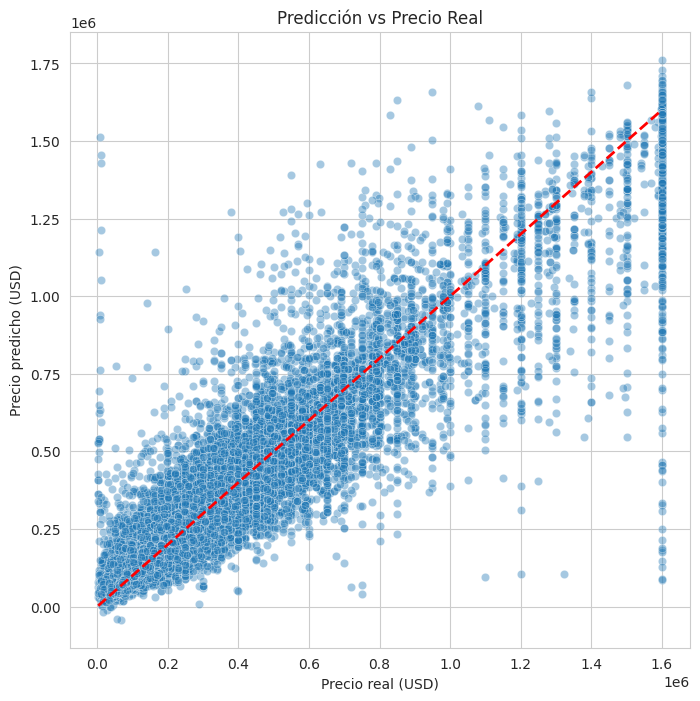

In [119]:
# grafico de predicciones vs valores reales
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Precio real (USD)')
plt.ylabel('Precio predicho (USD)')
plt.title('Predicción vs Precio Real')
plt.grid(True)
plt.show()

Insight:

* Tendencia positiva clara:A medida que el precio real sube, también suben las predicciones. El modelo captura bien la relación general entre las variables.

* Gran parte de los puntos están cerca de la diagonal: la mayoría de los casos, el modelo acierta bastante.

Lo que se podría mejorar:

* Dispersión aumenta con el precio (heterocedasticidad):Para propiedades caras (más de 800,000 USD), las predicciones varían más.Esto es normal en modelos de precios inmobiliarios: cuanto más caro, mayor incertidumbre.

* Predicciones sesgadas hacia abajo en propiedades caras:Muchos puntos están por debajo de la línea roja → el modelo subestima precios altos.

Podrías: Aumentar profundidad del modelo o n_estimators

* Algunos outliers claros: Hay puntos muy alejados de la diagonal.

Conclusión: El modelo tiene un buen rendimiento global y predice con alta precisión en la mayoria de casos. Pero tiene mayores errores en propiedaes de alto valor.

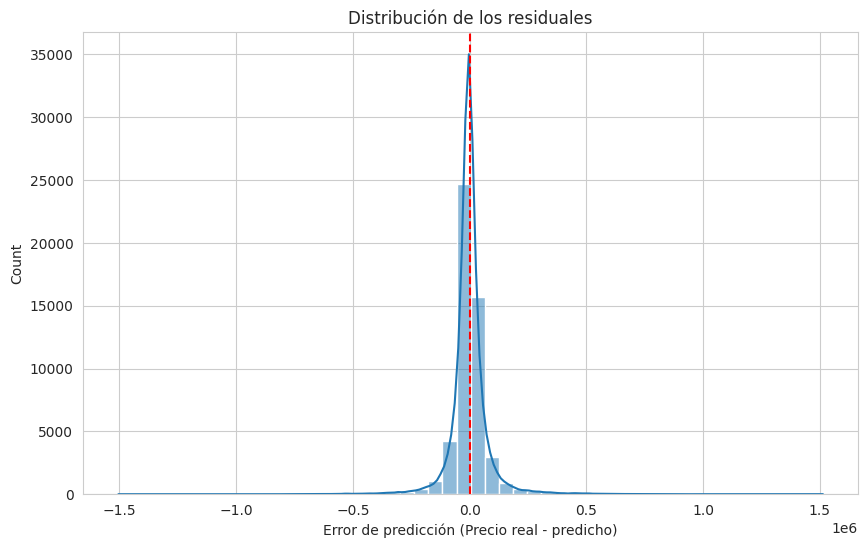

In [120]:
#grafico de residuales(errores de predicción)

residuals = y_test - y_pred_test

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Error de predicción (Precio real - predicho)')
plt.title('Distribución de los residuales')
plt.grid(True)
plt.show()

Insights:

* Distribución centrada en 0: El pico máximo está en 0, lo cual indica que el modelo no tiene sesgo sistemático.Es decir, no tiende a predecir consistentemente más alto o más bajo que el valor real.

* La forma de la curva es aproximadamente simétrica, lo que indica que el modelo se equivoca tanto hacia arriba como hacia abajo de manera similar.

* Mayoría de los errores están cerca de 0: La mayoría de las predicciones tienen errores pequeños → el modelo predice bien en general.

Lo que se puede mejorar:

* Cola larga hacia la izquierda:Hay algunos casos con errores muy grandes (más de -1,500,000 USD).Esto indica que en algunas propiedades, el modelo subestimó muchísimo el precio real.

* Posibles causas: propiedades atipicas, outliers sin tratar, variables faltantes o mal representadas.

* Cola también hacia la derecha, aunque menos pronunciada:

* La curva es muy alta y delgada → la mayoría de los errores están muy concentrados cerca del cero. puede indicar que en ciertos segmentos el modelo es menos estable (por ejemplo, se comporta bien en propiedades estándar, pero mal en casos atípicos).



# Modelo final

In [121]:
best_params = best_model.get_params()

In [122]:
best_model = XGBRegressor(**best_params)
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8041029546440078, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.11540474125973012, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=392, n_jobs=1,
             num_parallel_tree=None, random_state=42, ...)

In [123]:
X = pd.concat([X_train_df, X_test_df], axis=0).reset_index(drop=True)
y = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

In [124]:
best_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8041029546440078, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.11540474125973012, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=392, n_jobs=1,
             num_parallel_tree=None, random_state=42, ...)

# Validación cruzada

In [125]:
# Defino métricas para cross_validate
scoring = {
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'mae': 'neg_mean_absolute_error',   # sklearn devuelve negativo para errores que minimizan, lo corregimos luego
    'r2': 'r2'
}

# cross_validate (devuelve diccionario con test_score para cada métrica y fold)
cv_results = cross_validate(
    best_model, X, y,
    cv=5,
    scoring=scoring,
    return_train_score=False
)

# Organizo resultados por fold en DataFrame
results_df = pd.DataFrame({
    'Fold': range(1, 6),
    'RMSE': cv_results['test_rmse'],
    'MAE': -cv_results['test_mae'],  # invertir signo
    'R2': cv_results['test_r2']
})

results_df

,Fold,RMSE,MAE,R2
0,1,91112.193389,46946.534165,0.877784
1,2,93125.111930,47803.180187,0.868152
2,3,89188.692266,47562.264691,0.881015
3,4,91252.708379,47585.168847,0.871131
4,5,88188.018789,46575.152060,0.880933


In [126]:
print("\nResumen estadístico:")
results_df.drop('Fold', axis=1).describe()


Resumen estadístico:


,RMSE,MAE,R2
count,5.000000,5.000000,5.000000
mean,90573.344951,47294.459990,0.875803
std,1928.111186,513.196725,0.005869
min,88188.018789,46575.152060,0.868152
25%,89188.692266,46946.534165,0.871131
50%,91112.193389,47562.264691,0.877784
75%,91252.708379,47585.168847,0.880933
max,93125.111930,47803.180187,0.881015
